使用 Pandas 处理现实世界数据
我们在第 7 周讨论了使用 Pandas 的一些基础知识。本周，我们将进一步探索处理现实世界数据的示例：处理缺失数据和处理基于文本的数据。

1. 处理缺失数据
你应该将以下三个数据集放在与此 Notebook 相同的文件夹中：

tag00034-2.csv
wfhuk_1.1_dec2015.csv
COSING_Ingredients-Fragrance Inventory_v2.csv
第一个数据集是来自欧盟的葡萄酒生产数据，可以从 这里下载。这个数据集包含一些缺失值。首先，注意当我们读取数据时会发生什么：

In [1]:
import pandas as pd
wine = pd.read_csv('tag00034-2.csv')
wine


,"prod_bal,bal_item,geo\time","B2200,12HL,AT","B2200,12HL,BE","B2200,12HL,BG","B2200,12HL,CY","B2200,12HL,CZ","B2200,12HL,DE","B2200,12HL,DK","B2200,12HL,EE","B2200,12HL,EL"
0,2005,2685.8,4.0,1961,328.943,580,10107,0,0,4282.0
1,2006,2225.3,3.0,1708,237.978,438,9256,0,0,3989.0
2,2007,2213.4,3.0,1757,183.000,434,9000,0,0,3874.3
3,2008,2578.1,3.0,1796,169.000,434,10363,:,:,3413.8
4,2009,2943.4,3.0,1617,146.750,840.3,10089,:,0,3869.1
5,2010,2313.7,3.0,1426,146.520,545,9320,:,0,3365.6
6,2011,1710.6,4.7,1224,117.600,385,6976,:,0,2950.0
7,2012,2783.1,5.4,1236,84.640,650,9223,:,0,2750.0
8,2013,2124.4,2.9,1442,111.830,487,9102,:,0,31.0
9,2014,2353.4,5.5,1913,108.100,0,8493,:,:,NaN


数据中的缺失值会用 NaN 表示，代表“不是一个数字”（Not a Number）。如果你在 Excel 中打开数据文件，你会发现这些值确实对应缺失的数据。

然而，该数据集并不一致。有时，缺失值只是一个空单元格，Pandas 会自动正确处理；有时，缺失值会用 : 表示。这种情况经常发生在数据收集中（由于不同的人使用不同的约定，或者由于不熟练和不一致的数据收集方式）。

例如，当我们打印某些单元格的内容时，我们可以看到它实际上是一个冒号和空格。我们可以通过将所有这些值替换为 NaN 来解决这个问题，使缺失数据用 NaN 统一表示：

In [2]:
import numpy as np
print(f'The string is "{wine.loc[11, "B2200,12HL,DK"]}".')

# 用 NaN 替换所有 ': ' 值
wine = wine.replace(': ', np.nan)
wine


The string is ": ".


,"prod_bal,bal_item,geo\time","B2200,12HL,AT","B2200,12HL,BE","B2200,12HL,BG","B2200,12HL,CY","B2200,12HL,CZ","B2200,12HL,DE","B2200,12HL,DK","B2200,12HL,EE","B2200,12HL,EL"
0,2005,2685.8,4.0,1961,328.943,580,10107,0,0,4282.0
1,2006,2225.3,3.0,1708,237.978,438,9256,0,0,3989.0
2,2007,2213.4,3.0,1757,183.000,434,9000,0,0,3874.3
3,2008,2578.1,3.0,1796,169.000,434,10363,NaN,NaN,3413.8
4,2009,2943.4,3.0,1617,146.750,840.3,10089,NaN,0,3869.1
5,2010,2313.7,3.0,1426,146.520,545,9320,NaN,0,3365.6
6,2011,1710.6,4.7,1224,117.600,385,6976,NaN,0,2950.0
7,2012,2783.1,5.4,1236,84.640,650,9223,NaN,0,2750.0
8,2013,2124.4,2.9,1442,111.830,487,9102,NaN,0,31.0
9,2014,2353.4,5.5,1913,108.100,0,8493,NaN,NaN,NaN


许多函数在计算时会忽略 NaN 值。然而，有时我们需要清理数据，可以通过以下两种主要方式完成：

移除包含 NaN 值的行（或列）。
用特定数值替换这些 NaN 值。
下面是两种数据清理操作的示例：

In [3]:
# 移除包含 NaN 值的所有行
wine.dropna(how='any')

# 将所有 NaN 替换为给定值
wine.fillna(value=0)


,"prod_bal,bal_item,geo\time","B2200,12HL,AT","B2200,12HL,BE","B2200,12HL,BG","B2200,12HL,CY","B2200,12HL,CZ","B2200,12HL,DE","B2200,12HL,DK","B2200,12HL,EE","B2200,12HL,EL"
0,2005,2685.8,4.0,1961,328.943,580,10107,0,0,4282.0
1,2006,2225.3,3.0,1708,237.978,438,9256,0,0,3989.0
2,2007,2213.4,3.0,1757,183.000,434,9000,0,0,3874.3
3,2008,2578.1,3.0,1796,169.000,434,10363,0,0,3413.8
4,2009,2943.4,3.0,1617,146.750,840.3,10089,0,0,3869.1
5,2010,2313.7,3.0,1426,146.520,545,9320,0,0,3365.6
6,2011,1710.6,4.7,1224,117.600,385,6976,0,0,2950.0
7,2012,2783.1,5.4,1236,84.640,650,9223,0,0,2750.0
8,2013,2124.4,2.9,1442,111.830,487,9102,0,0,31.0
9,2014,2353.4,5.5,1913,108.100,0,8493,0,0,0.0


2. 处理基于文本的数据
这是另一个数据集，来自英国政府的废弃物数据，可以从 这里下载。

Python 代码：

waste = pd.read_csv('wfhuk_1.1_dec2015.csv')
waste
如果我们只想要“Recycled”行，可以通过在 Measure 列中查找包含 Recycled 的行来实现。这可以结合文本方法 .loc[] 和布尔索引来完成。

Python 代码：

# 获取 'Measure' 列中以 'Recycled' 开头的所有行
waste[waste['Measure'].str.startswith('Recycled')]
注意这里使用了 .str，表示“字符串方法”：这些操作可以应用于 Pandas 的单独列（例如，一个数据框的单列），无需遍历每个单独元素。str.startswith() 是可用的字符串方法之一。

2.1 正则表达式模式

我们也可以进行更复杂的模式匹配。这使用了一种称为正则表达式的方式来表达文本模式。这是一个非常大的主题，这里我们仅通过一些示例来展示其用法。

以下是使用正则表达式模式的快速示例，使用更大、更复杂的数据集：这是一个关于香料成分的欧盟数据集。

Python 代码：

# 指定编码选项，因为默认值与数据文件不匹配
frag = pd.read_csv('COSING_Ingredients-Fragrance Inventory_v2.csv', encoding='utf')

# 打印出 'Chem/IUPAC Name / Description' 列中匹配 'Chamomil...' 模式的行
frag.loc[frag['Chem/IUPAC Name / Description'].str.match(r'Chamomil[lea]+') == True]
正则表达式允许我们更灵活地搜索符合模式的内容。在上面的例子中，正则表达式 r'Chamomil[lea]+' 会匹配以 “Chamomil...” 开头，后面可以是任意数量的字母 l 或 e 或 a。



panda 第三部分 聚合数据（Aggregating data）
在分析数据时，通常需要针对某个变量进行聚合。一种常用的工作流被称为分组-应用-合并（split-apply-combine）。以下是该方法的一个示例流程图，摘自 VanDerPlas 的《The Python Data Science Handbook》：

流程概述

Split（分组）：按指定键值将数据分组。
Apply（应用）：对分组后的数据应用函数（例如求和、计数等）。
Combine（合并）：将处理后的结果合并为一个新的数据框。

使用 Pandas 的 .groupby() 方法
Pandas 提供 .groupby() 方法来实现分组-应用-合并。

以下是一个使用宇航员数据的示例，展示了如何按国籍对数据分组：
代码生成了一个 DataFrameGroupBy 对象，这是分组后的结果，但尚未应用具体函数（处于“Split”阶段）。

In [4]:
import pandas as pd

# 读取数据
astronauts = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-14/astronauts.csv')
astronauts = astronauts.fillna('')  # 填充空值

# 按国籍分组
astronauts.groupby('nationality')


示例 1：获取特定组的数据
可以使用 .get_group() 查看某个特定分组的数据。例如，查看所有日本宇航员的信息：



In [5]:
# 仅显示日本宇航员
astronauts.groupby('nationality').get_group('Japan')


,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
543,544,242,1,"Akiyama, Toyohiro",秋山豊寛,male,1942,Japan,civilian,TBS,...,1990,Soyuz TM-11/10,Soyuz TM-11,Soyuz TM-11,Soyuz TM-10,189.90,189.90,0,0.00,0.00
658,659,285,2,"Mohri, Mamoru",毛利衛,male,1948,Japan,civilian,NASDA-1,...,1992,STS-47,STS-47,STS-47,STS-47,190.50,190.50,0,0.00,0.00
659,660,285,2,"Mohri, Mamoru",毛利衛,male,1948,Japan,civilian,NASDA-1,...,2000,STS-99,STS-99,STS-99,STS-99,269.70,190.50,0,0.00,0.00
762,763,316,3,"Mukai, Chiaki",向井千秋,female,1952,Japan,civilian,NASDA-1,...,1994,STS-65,STS-65,STS-65,STS-65,354.00,568.00,0,0.00,0.00
763,764,316,3,"Mukai, Chiaki",向井千秋,female,1952,Japan,civilian,NASDA-1,...,1998,STS-95,STS-95,STS-95,STS-95,214.00,568.00,0,0.00,0.00
845,846,343,4,"Wakata, Koichi",若田光一,male,1963,Japan,civilian,NASDA-2,...,1996,STS-72,STS-72,STS-72,STS-72,214.00,8336.50,0,0.00,0.00
846,847,343,4,"Wakata, Koichi",若田光一,male,1963,Japan,civilian,NASDA-2,...,2000,STS-92,STS-92,STS-92,STS-92,309.75,8336.50,0,0.00,0.00
847,848,343,4,"Wakata, Koichi",若田光一,male,1963,Japan,civilian,NASDA-2,...,2009,18,STS-119,ISS,STS-127,3303.00,8336.50,0,0.00,0.00
848,849,343,4,"Wakata, Koichi",若田光一,male,1963,Japan,civilian,NASDA-2,...,2013,38,Soyuz TMA-11M,ISS,Soyuz TMA-11M,4509.75,8336.50,0,0.00,0.00
911,912,370,5,"Doi, Takao",土井隆雄,male,1954,Japan,civilian,NASDA-1,...,1997,STS-87,STS-87,STS-87,STS-87,376.50,763.60,2,12.70,12.70


示例 2：计算每个国家的独特宇航员数量
以下代码展示了如何计算每个国家独特的宇航员数量，并按降序排列结果：
代码解释：

.groupby('nationality')：按“国籍”分组。
['name']：提取每个分组中的“姓名”列。
.nunique()：统计每个分组中的独特值数量。
.sort_values(ascending=False)：按降序排列结果。

In [7]:
astronauts.groupby('nationality')['name'].nunique().sort_values(ascending=False)


nationality
U.S.                        344
U.S.S.R/Russia              122
Japan                        12
Germany                      11
China                        11
France                       10
Canada                       10
Italy                         7
U.K./U.S.                     3
U.K.                          2
Netherland                    2
Bulgaria                      2
Belgium                       2
Republic of South Africa      1
U.S.S.R/Ukraine               1
Syria                         1
Switzerland                   1
UAE                           1
Sweden                        1
Spain                         1
Slovakia                      1
Saudi Arabia                  1
Romania                       1
Afghanistan                   1
Malysia                       1
Poland                        1
Mongolia                      1
Mexico                        1
Australia                     1
Korea                         1
Kazakhstan                  

示例 3：计算每个职业的任务总时长
以下代码统计每种职业的宇航员在任务中的总时长，并按降序排列：


In [8]:
astronauts.groupby('occupation')['eva_hrs_mission'].sum().sort_values(ascending=False)


occupation
MSP                        2249.237
flight engineer            1317.060
commander                   958.897
pilot                       144.040
Flight engineer               6.230
Other (Journalist)            0.000
Other (Space tourist)         0.000
Other (space tourist)         0.000
PSP                           0.000
Pilot                         0.000
Space tourist                 0.000
spaceflight participant       0.000
Name: eva_hrs_mission, dtype: float64

示例 4：清理职业数据
在上述数据中，“space tourist” 存在多种不同拼写方式，“pilot” 和 “flight engineer” 也有多个标签。以下代码清理这些职业数据：

In [9]:
# 标记 “space tourist”
tourist_rows = astronauts['occupation'].str.contains('space tourist', case=False)
astronauts.loc[tourist_rows, 'occupation'] = 'Space tourist'

# 标记 “pilot” 和 “flight engineer”
pilot_flighteng_rows = astronauts['occupation'].str.startswith('pilot') | astronauts['occupation'].str.startswith('flight engineer')
astronauts.loc[pilot_flighteng_rows, 'occupation'] = astronauts.loc[pilot_flighteng_rows, 'occupation'].str.capitalize()


示例 5：可视化职业数据
使用 Seaborn 绘制职业任务时长的条形图：

/Users/chenji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/chenji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


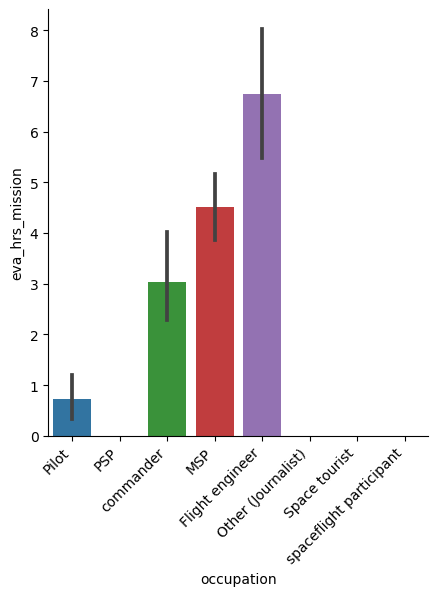

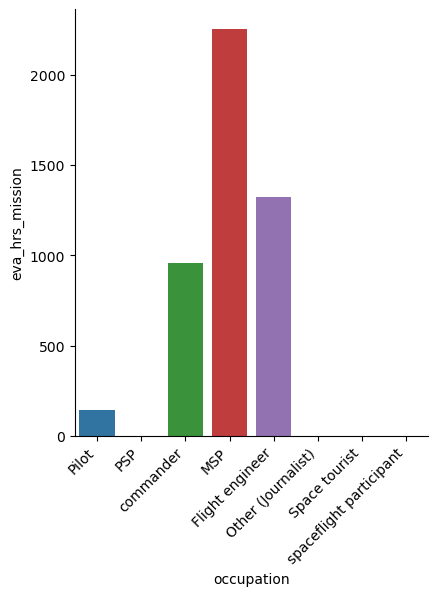

In [10]:
import seaborn as sns

# 默认行为：显示平均任务时长
grid = sns.catplot(data=astronauts, kind='bar', x='occupation', y='eva_hrs_mission')
grid.set_xticklabels(rotation=45, verticalalignment='top', horizontalalignment='right')

# 修改为总任务时长
grid = sns.catplot(data=astronauts, kind='bar', x='occupation', y='eva_hrs_mission', estimator='sum', errorbar=None)
grid.set_xticklabels(rotation=45, verticalalignment='top', horizontalalignment='right')


使用 Seaborn 进行数据可视化
Seaborn 是基于 Matplotlib 的库，为各种统计数据和数据可视化提供了非常有用的工具。就像 Pandas 一样，我们无法在这里展示所有功能，但幸运的是，官方文档提供了以下内容：

丰富的示例库 展示了各种可视化类型。
详细的入门教程。
所有绘图函数的概述。
通常，与 Matplotlib 类似，创建图表的一个好方法是从示例库开始，找到与你的用例相似的示例，然后修改代码以适应你的需求。

1. 示例：宇航员数据
让我们看另一个数据集，该数据集列出了截至 2020 年所有进入太空的宇航员，以及他们不同任务的信息。

In [11]:
import pandas as pd

# 读取数据
astronauts = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-14/astronauts.csv')
astronauts = astronauts.fillna('')  # 填充空值
astronauts.head(8)  # 查看前8行


,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0
5,6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,...,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0.0,0.0
6,7,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-2,...,1970,Soyuz 9,Soyuz 9,Soyuz 9,Soyuz 9,424.00,519.33,0,0.0,0.0
7,8,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,TsPK-1,...,1962,Vostok 4,Vostok 4,Vostok 4,Vostok 4,70.93,448.45,0,0.0,0.0


1.1 分类图（Categorical Plot）
接下来，我们绘制军事宇航员和非军事宇航员每年进入太空的分布，以及他们的性别（男性/女性）。这里我们需要一个分类图（categorical plot），因为我们正在尝试可视化分类数据（例如，军事/非军事、男性/女性）。

/Users/chenji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


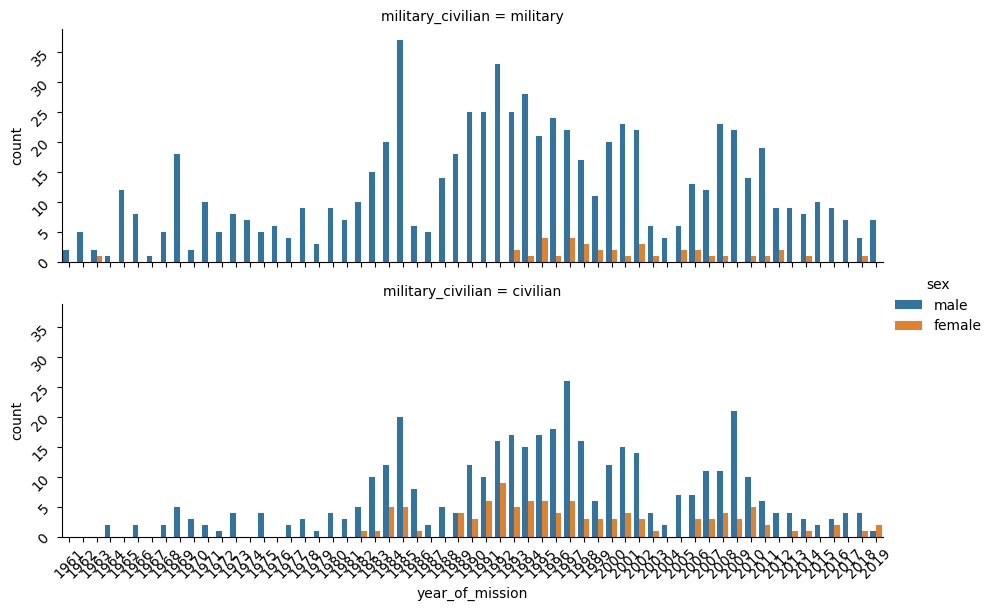

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制分类图
grid = sns.catplot(
    data=astronauts,
    kind='count',            # 使用计数图
    x='year_of_mission',     # x轴为任务年份
    col='military_civilian', # 按军事/非军事分列
    hue='sex',               # 按性别分组
    legend=True,             # 显示图例
    col_wrap=1,              # 每行一个子图
    height=3,                # 子图高度
    aspect=3                 # 子图宽高比
)

# 旋转x轴标签，便于阅读
grid.tick_params(labelrotation=45)
plt.show()


1.2 关系图（Relational Plot）
宇航员使用不同的航天飞机前往 Mir 空间站或国际空间站（ISS）。如果查看数据，会发现主要使用 STS（美国航天飞机）和 Soyuz（俄罗斯航天器）。我们可以根据任务的年份和时长进行可视化。

数据清理：

首先，我们选择相关数据列并将航天器类型统一为两个类别：

In [13]:
# 筛选 Mir 或 ISS 的相关数据
rows = (astronauts['in_orbit'] == 'Mir') | (astronauts['in_orbit'] == 'ISS')
columns = ['year_of_mission', 'ascend_shuttle', 'in_orbit', 'hours_mission']
station_trips = astronauts.loc[rows, columns]

# 清理航天器类别
station_trips.loc[station_trips['ascend_shuttle'].str.contains('soyuz', case=False), 'ascend_shuttle'] = 'Soyuz'
station_trips.loc[station_trips['ascend_shuttle'].str.contains('sts', case=False), 'ascend_shuttle'] = 'Space Shuttle'


数据可视化：

以下代码将绘制任务年份和时长的关系图，按航天器类型（颜色区分）和空间站类型（点样式区分）显示：

/Users/chenji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


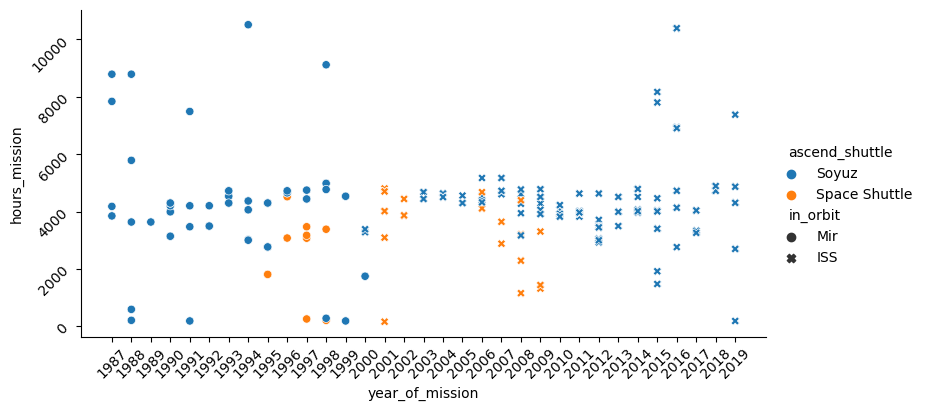

In [14]:
grid = sns.relplot(
    data=station_trips,
    x='year_of_mission',   # x轴为任务年份
    y='hours_mission',     # y轴为任务时长
    hue='ascend_shuttle',  # 按航天器类型分组（颜色）
    style='in_orbit',      # 按空间站类型分组（点样式）
    height=4,              # 图表高度
    aspect=2               # 图表宽高比
)

# 设置x轴标签旋转角度
grid.set(xticks=station_trips['year_of_mission'].unique())  # 设置x轴刻度为任务年份
grid.tick_params(labelrotation=45)  # 旋转x轴标签
plt.show()


结论
通过这些可视化，我们可以观察到：

空间站任务平均持续约 4000 小时（约6个月），但有宇航员任务时长超过 10,000 小时（超过1年）。
“Space Shuttle”（美国航天飞机）直到 2001 年退役，之后由 Soyuz 执行大部分任务。
Soyuz 自 2010 年以来成为唯一将人类送往 ISS 的方式。